In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [2]:

# Define file paths for School A
file_path_all_course = '/content/sample_data/School A/all_course.xlsx'
file_path_remarketing = '/content/sample_data/School A/remarketing.xlsx'
file_path_summer_only = '/content/sample_data/School A/summer_only.xlsx'

# Define file paths for School B
file_path_highschool = '/content/sample_data/School B/Highshcool.xlsx'
file_path_main = '/content/sample_data/School B/main.xlsx'
file_path_others = '/content/sample_data/School B/others.xlsx'

# Function to load and clean data
def load_and_clean_data(file_path, header_row):
    df = pd.read_excel(file_path, header=header_row)  # Set the header row
    return df

# Load and clean data for School A
A_all_course = load_and_clean_data(file_path_all_course, 2)
A_remarketing = load_and_clean_data(file_path_remarketing, 2)
A_summer_only = load_and_clean_data(file_path_summer_only, 2)

# Load and clean data for School B
B_highschool = load_and_clean_data(file_path_highschool, 2)
B_main = load_and_clean_data(file_path_main, 2)
B_others = load_and_clean_data(file_path_others, 2)

# Display the first few rows of each DataFrame to ensure they are loaded and cleaned correctly
print("Data for School A - All Course:")
print(A_all_course.head())

print("\nData for School A - Remarketing:")
print(A_remarketing.head())

print("\nData for School A - Summer Only:")
print(A_summer_only.head())

print("\nData for School B - High School:")
print(B_highschool.head())

print("\nData for School B - Main:")
print(B_main.head())

print("\nData for School B - Others:")
print(B_others.head())


Data for School A - All Course:
      Campaign Campaign state Campaign type       Week  Clicks  Impr.     CTR  \
0  All Courses        Enabled        Search 2022-10-17     360   2881  0.1250   
1  All Courses        Enabled        Search 2022-10-24     485   3174  0.1528   
2  All Courses        Enabled        Search 2022-10-31     500   4120  0.1214   
3  All Courses        Enabled        Search 2022-11-07     508   3962  0.1282   
4  All Courses        Enabled        Search 2022-11-14     413   2802  0.1474   

  Currency code  Avg. CPC    Cost  Impr. (Abs. Top) %  Conversions  \
0           GBP      1.29  464.06              0.4665          1.0   
1           GBP      0.94  457.97              0.4458         11.0   
2           GBP      0.92  460.76              0.4250          4.0   
3           GBP      0.95  481.64              0.4036         13.0   
4           GBP      1.04  431.26              0.3876          3.0   

   Cost / conv.  Conv. rate  
0        464.06      0.0028  


In [3]:
A_all_course.head()

,Campaign,Campaign state,Campaign type,Week,Clicks,Impr.,CTR,Currency code,Avg. CPC,Cost,Impr. (Abs. Top) %,Conversions,Cost / conv.,Conv. rate
0,All Courses,Enabled,Search,2022-10-17,360,2881,0.1250,GBP,1.29,464.06,0.4665,1.0,464.06,0.0028
1,All Courses,Enabled,Search,2022-10-24,485,3174,0.1528,GBP,0.94,457.97,0.4458,11.0,41.63,0.0227
2,All Courses,Enabled,Search,2022-10-31,500,4120,0.1214,GBP,0.92,460.76,0.4250,4.0,115.19,0.0080
3,All Courses,Enabled,Search,2022-11-07,508,3962,0.1282,GBP,0.95,481.64,0.4036,13.0,37.05,0.0256
4,All Courses,Enabled,Search,2022-11-14,413,2802,0.1474,GBP,1.04,431.26,0.3876,3.0,143.75,0.0073


In [4]:
A_remarketing.head()

,Campaign,Campaign state,Campaign type,Week,Currency code,Budget,Clicks,Impr.,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate
0,Re-Marketing,Paused,Display,2023-04-24,GBP,5,42,4934,0.0085,0.05,1.96,0,0.00,0.0000
1,Re-Marketing,Paused,Display,2023-05-01,GBP,5,157,52227,0.0030,0.08,12.83,3,4.28,0.0191
2,Re-Marketing,Paused,Display,2023-05-08,GBP,5,10,6360,0.0016,0.54,5.42,0,0.00,0.0000
3,Re-Marketing,Paused,Display,2023-05-15,GBP,5,12,8039,0.0015,0.97,11.61,0,0.00,0.0000
4,Re-Marketing,Paused,Display,2023-05-22,GBP,5,17,6447,0.0026,2.06,35.01,0,0.00,0.0000


In [5]:
A_summer_only.head()

,Campaign,Campaign state,Campaign type,Week,Clicks,Impr.,CTR,Currency code,Avg. CPC,Cost,Impr. (Abs. Top) %,Conversions,Cost / conv.,Conv. rate
0,Summer Only,Paused,Search,2022-12-12,97,456,0.2127,GBP,0.86,83.00,0.2561,4,20.75,0.0412
1,Summer Only,Paused,Search,2022-12-19,137,869,0.1577,GBP,0.64,87.10,0.1684,2,43.55,0.0146
2,Summer Only,Paused,Search,2022-12-26,188,1018,0.1847,GBP,0.68,127.29,0.2342,0,0.00,0.0000
3,Summer Only,Paused,Search,2023-01-02,196,1300,0.1508,GBP,0.59,116.57,0.1919,4,29.14,0.0204
4,Summer Only,Paused,Search,2023-01-09,244,1421,0.1717,GBP,0.47,115.65,0.1503,2,57.83,0.0082


Adding budgets variation for each campaign

In [6]:
# Add 'Budget' column and assign values based on the given change history
def assign_budget(df):
    df['Budget'] = 65  # Default budget before the first change

    # Apply budget changes based on the provided dates
    df.loc[df['Week'] >= '2022-12-14', 'Budget'] = 49
    df.loc[df['Week'] >= '2023-01-18', 'Budget'] = 57
    df.loc[df['Week'] >= '2023-04-17', 'Budget'] = 52
    df.loc[df['Week'] >= '2023-04-18', 'Budget'] = 60

    return df

# Assign budgets to the 'All Course' DataFrame
A_all_course = assign_budget(A_all_course)

# Display the updated DataFrame to ensure budgets are assigned correctly
print(A_all_course[['Week', 'Cost', 'Budget']].head(20))


         Week    Cost  Budget
0  2022-10-17  464.06      65
1  2022-10-24  457.97      65
2  2022-10-31  460.76      65
3  2022-11-07  481.64      65
4  2022-11-14  431.26      65
5  2022-11-21  480.18      65
6  2022-11-28  437.83      65
7  2022-12-05  447.39      65
8  2022-12-12  332.51      65
9  2022-12-19  338.42      49
10 2022-12-26  401.74      49
11 2023-01-02  332.11      49
12 2023-01-09  350.32      49
13 2023-01-16  339.10      49
14 2023-01-23  400.97      57
15 2023-01-30  457.90      57
16 2023-02-06  395.52      57
17 2023-02-13  415.07      57
18 2023-02-20  469.78      57
19 2023-02-27  363.92      57


In [7]:
# Add 'Budget' column and assign values based on the given change history for 'Summer Only' campaign
def assign_budget_summer_only(df):
    df['Budget'] = 16  # Default budget before the first change

    # Apply budget changes based on the provided dates
    df.loc[df['Week'] >= '2023-01-16', 'Budget'] = 8

    return df

# Assign budgets to the 'Summer Only' DataFrame
A_summer_only = assign_budget_summer_only(A_summer_only)

# Display the updated DataFrame to ensure budgets are assigned correctly
print(A_summer_only[['Week', 'Cost', 'Budget']].head(20))


         Week    Cost  Budget
0  2022-12-12   83.00      16
1  2022-12-19   87.10      16
2  2022-12-26  127.29      16
3  2023-01-02  116.57      16
4  2023-01-09  115.65      16
5  2023-01-16   55.05       8
6  2023-01-23   66.92       8
7  2023-01-30   48.93       8
8  2023-02-06   62.74       8
9  2023-02-13   65.36       8
10 2023-02-20   51.64       8
11 2023-02-27   66.19       8
12 2023-03-06   59.87       8
13 2023-03-13   44.09       8
14 2023-03-20   60.44       8
15 2023-03-27   54.09       8
16 2023-04-03   57.84       8
17 2023-04-10   56.39       8
18 2023-04-17   14.88       8


Data cleaning for school A

In [8]:
# Check for missing values in each DataFrame
print("Missing values in 'All Course' dataset:")
print(A_all_course.isnull().sum())

print("\nMissing values in 'Remarketing' dataset:")
print(A_remarketing.isnull().sum())

print("\nMissing values in 'Summer Only' dataset:")
print(A_summer_only.isnull().sum())

Missing values in 'All Course' dataset:
Campaign              0
Campaign state        0
Campaign type         0
Week                  0
Clicks                0
Impr.                 0
CTR                   0
Currency code         0
Avg. CPC              0
Cost                  0
Impr. (Abs. Top) %    0
Conversions           0
Cost / conv.          0
Conv. rate            0
Budget                0
dtype: int64

Missing values in 'Remarketing' dataset:
Campaign          0
Campaign state    0
Campaign type     0
Week              0
Currency code     0
Budget            0
Clicks            0
Impr.             0
CTR               0
Avg. CPC          0
Cost              0
Conversions       0
Cost / conv.      0
Conv. rate        0
dtype: int64

Missing values in 'Summer Only' dataset:
Campaign              0
Campaign state        0
Campaign type         0
Week                  0
Clicks                0
Impr.                 0
CTR                   0
Currency code         0
Avg. CPC          

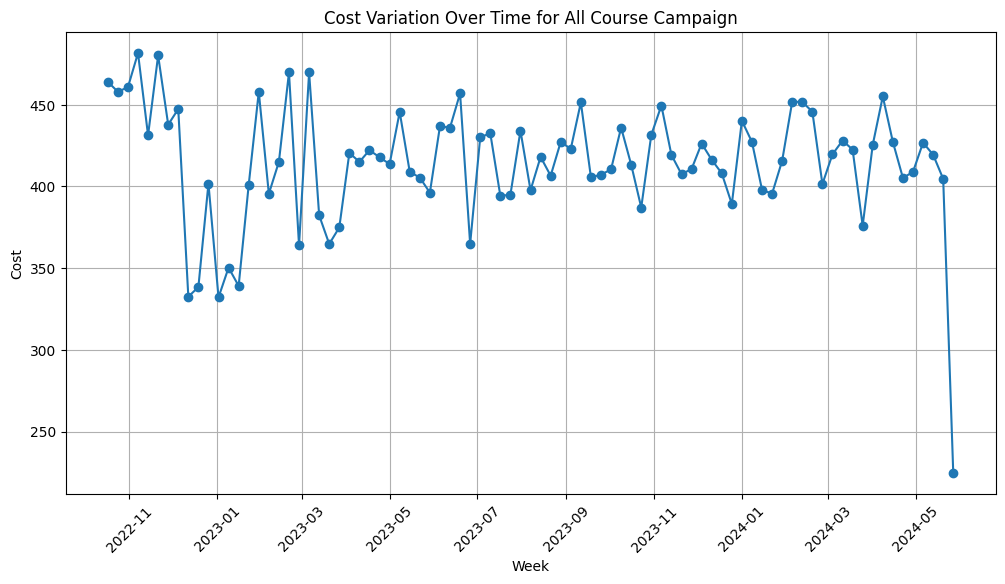

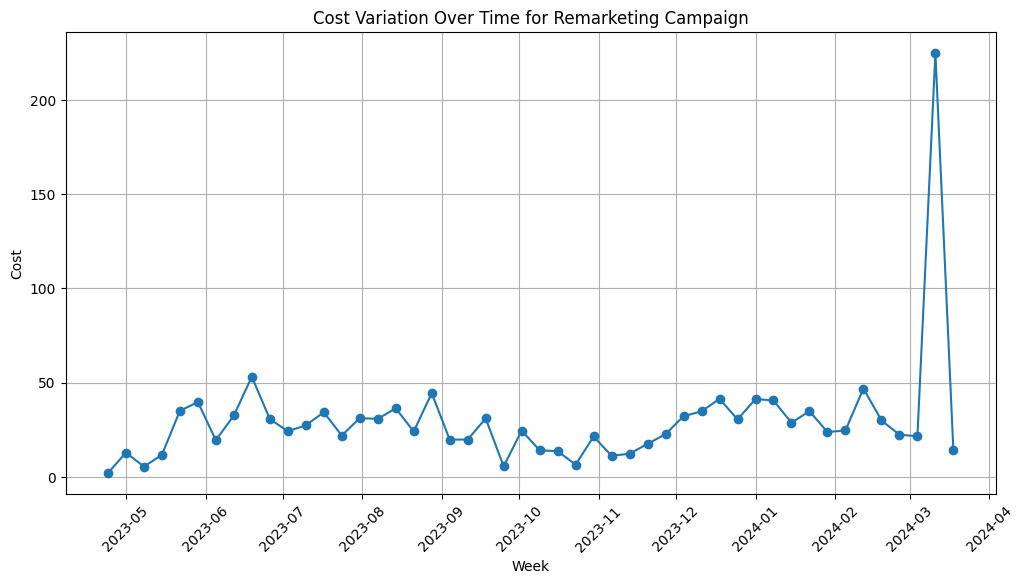

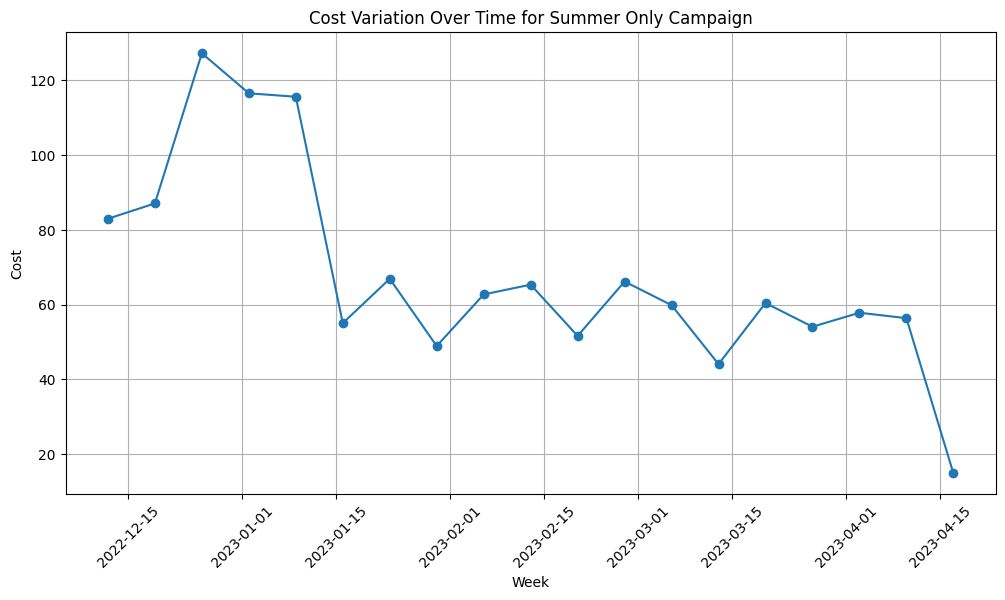

In [9]:
import matplotlib.pyplot as plt

# Function to plot cost variation over time
def plot_cost_variation(df, title):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Week'], df['Cost'], marker='o')
    plt.title(title)
    plt.xlabel('Week')
    plt.ylabel('Cost')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plot cost variation over time for each dataset
plot_cost_variation(A_all_course, 'Cost Variation Over Time for All Course Campaign')
plot_cost_variation(A_remarketing, 'Cost Variation Over Time for Remarketing Campaign')
plot_cost_variation(A_summer_only, 'Cost Variation Over Time for Summer Only Campaign')

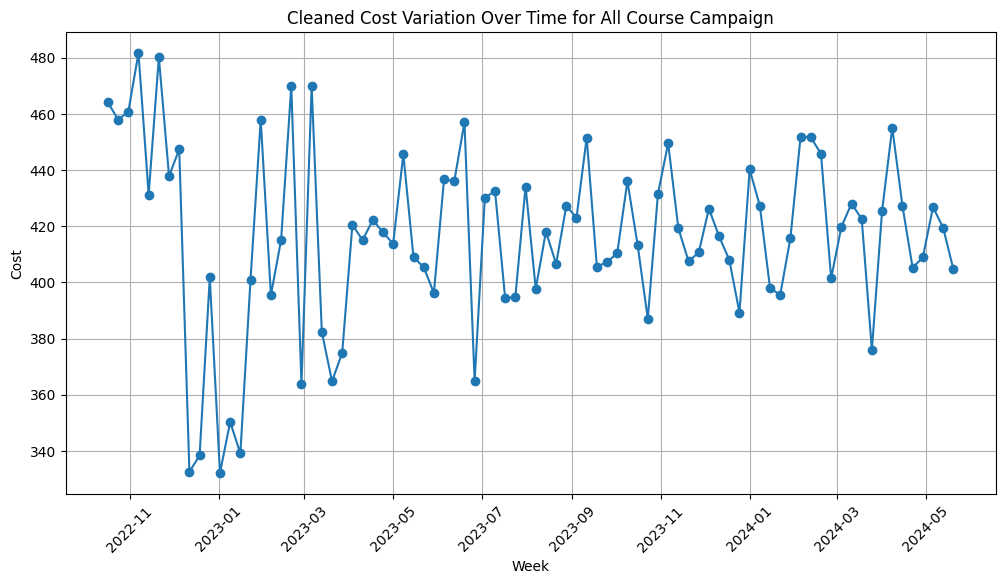

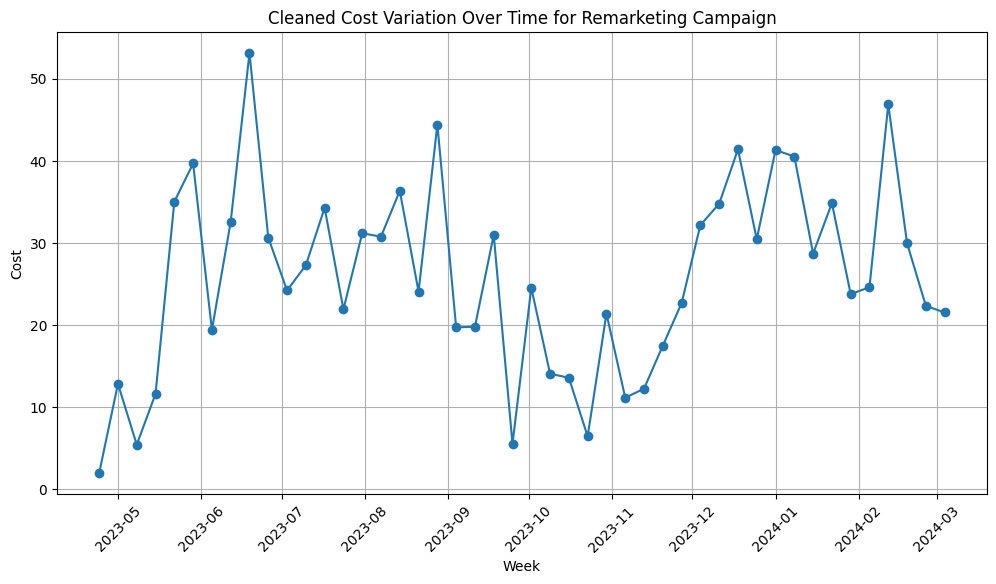

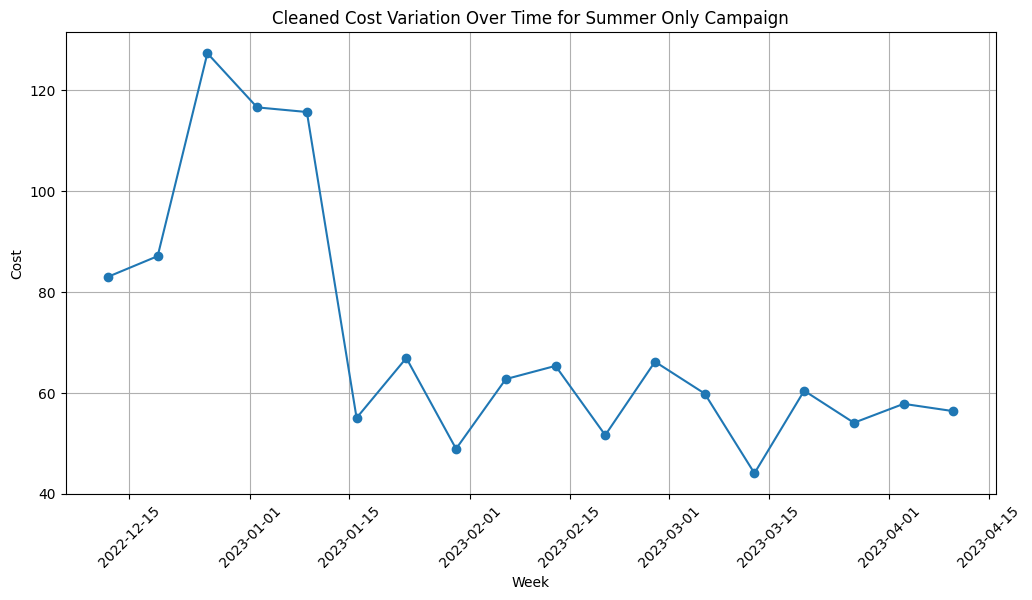

In [10]:
# Function to remove the last week's data
def remove_last_week(df):
    last_week = df['Week'].max()
    cleaned_df = df[df['Week'] != last_week]
    return cleaned_df

# Function to remove the last two weeks of data
def remove_last_two_weeks(df):
    last_two_weeks = df['Week'].nlargest(2).values
    cleaned_df = df[~df['Week'].isin(last_two_weeks)]
    return cleaned_df


# Remove the last week's data for 'all course' and 'summer only' then remove last two week for 'remarketing'
A_all_course_cleaned = remove_last_week(A_all_course)
A_remarketing_cleaned = remove_last_two_weeks(A_remarketing)
A_summer_only_cleaned = remove_last_week(A_summer_only)

# Plot cleaned cost variation for each dataset
plot_cost_variation(A_all_course_cleaned, 'Cleaned Cost Variation Over Time for All Course Campaign')
plot_cost_variation(A_remarketing_cleaned, 'Cleaned Cost Variation Over Time for Remarketing Campaign')
plot_cost_variation(A_summer_only_cleaned, 'Cleaned Cost Variation Over Time for Summer Only Campaign')


In [11]:
# Concatenate the three DataFrames
df_combined = pd.concat([A_all_course_cleaned, A_remarketing_cleaned, A_summer_only_cleaned])

# Group by 'Week' and sum the relevant columns
df_aggregated = df_combined.groupby('Week').sum().reset_index()

# Drop unnecessary columns
columns_to_drop = ['Campaign', 'Campaign state', 'Campaign type', 'CTR', 'Currency code','Avg. CPC','Impr. (Abs. Top) %','Cost / conv.', 'Conv. rate']
df_aggregated = df_aggregated.drop(columns=columns_to_drop)
df_aggregated.head(80)


,Week,Clicks,Impr.,Cost,Conversions,Budget
0,2022-10-17,360,2881,464.06,1.00,65
1,2022-10-24,485,3174,457.97,11.00,65
2,2022-10-31,500,4120,460.76,4.00,65
3,2022-11-07,508,3962,481.64,13.00,65
4,2022-11-14,413,2802,431.26,3.00,65
...,...,...,...,...,...,...
75,2024-03-25,457,12476,375.96,17.00,60
76,2024-04-01,489,13649,425.48,21.35,60
77,2024-04-08,460,9497,455.09,11.00,60
78,2024-04-15,423,6470,427.27,19.00,60


In [12]:
# Save the cleaned DataFrames to Excel files
A_all_course_cleaned.to_excel('/content/sample_data/School A/all_course_cleaned.xlsx', index=False)
A_remarketing_cleaned.to_excel('/content/sample_data/School A/remarketing_cleaned.xlsx', index=False)
A_summer_only_cleaned.to_excel('/content/sample_data/School A/summer_only_cleaned.xlsx', index=False)

# Save the aggregated DataFrame to an Excel file
df_aggregated.to_excel('/content/sample_data/School A/total_marketing_effects.xlsx', index=False)

Adding the Budgets for School B

In [13]:
B_highschool.head()

,Campaign,Week,Currency code,Budget,Clicks,Impr.,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate
0,High School Only,2022-12-12,GBP,10,98,1575,0.0622,0.79,77.79,2.0,38.90,0.0204
1,High School Only,2022-12-19,GBP,10,133,2187,0.0608,0.82,109.40,0.0,0.00,0.0000
2,High School Only,2022-12-26,GBP,10,126,2051,0.0614,0.80,101.26,0.0,0.00,0.0000
3,High School Only,2023-01-02,GBP,10,170,2595,0.0655,0.69,117.04,3.0,39.01,0.0176
4,High School Only,2023-01-09,GBP,10,162,2285,0.0709,0.67,107.92,6.0,17.99,0.0370


In [14]:
B_main.head()

,Campaign,Week,Currency code,Budget,Clicks,Impr.,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate
0,All Courses,2022-10-17,GBP,100,283,3678,0.0769,1.57,443.33,3.0,147.78,0.0106
1,All Courses,2022-10-24,GBP,100,267,3269,0.0817,1.73,463.10,12.0,38.59,0.0449
2,All Courses,2022-10-31,GBP,100,425,4934,0.0861,1.14,483.25,6.0,80.54,0.0141
3,All Courses,2022-11-07,GBP,100,534,5908,0.0904,0.87,465.03,13.0,35.77,0.0243
4,All Courses,2022-11-14,GBP,100,493,5938,0.0830,0.82,401.97,10.0,40.20,0.0203


In [15]:
B_others.head()

,Campaign,Week,Currency code,Budget,Clicks,Impr.,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate
0,Amber a/b testing Academic English,2024-05-13,GBP,20,262,14435,0.0182,0.31,82.38,1,82.38,0.0038
1,Amber a/b testing Academic English,2024-05-20,GBP,20,580,32699,0.0177,0.24,138.99,8,17.37,0.0138
2,Amber a/b testing Academic English,2024-05-27,GBP,20,21,3861,0.0054,1.05,22.02,1,22.02,0.0476
3,Amber a/b testing Competitors,2024-05-13,GBP,20,373,17799,0.0210,0.26,98.50,6,16.42,0.0161
4,Amber a/b testing Competitors,2024-05-20,GBP,20,352,32367,0.0109,0.26,90.86,18,5.05,0.0511


In [16]:
# Add 'Budget' column and assign values based on the given change history for 'High School Only' campaign
def assign_budget_highschool(df):
    df['Budget'] = 16  # Default budget before the first change
    df.loc[df['Week'] >= '2023-05-16', 'Budget'] = 36
    df.loc[df['Week'] >= '2023-07-05', 'Budget'] = 30
    df.loc[df['Week'] >= '2023-12-04', 'Budget'] = 10
    return df

# Assign budgets to the 'High School Only' DataFrame
B_highschool = assign_budget_highschool(B_highschool)

# Display the updated DataFrame to ensure budgets are assigned correctly
print(B_highschool[['Week', 'Cost', 'Budget']].head(20))

         Week    Cost  Budget
0  2022-12-12   77.79      16
1  2022-12-19  109.40      16
2  2022-12-26  101.26      16
3  2023-01-02  117.04      16
4  2023-01-09  107.92      16
5  2023-01-16  115.54      16
6  2023-01-23  106.24      16
7  2023-01-30  101.87      16
8  2023-02-06  155.00      16
9  2023-02-13  117.34      16
10 2023-02-20  114.72      16
11 2023-02-27   99.51      16
12 2023-03-06  139.85      16
13 2023-03-13  104.67      16
14 2023-03-20  108.47      16
15 2023-03-27  100.57      16
16 2023-04-03  107.70      16
17 2023-04-10  112.70      16
18 2023-04-17   96.85      16
19 2023-04-24   61.21      16


In [17]:
# Add 'Budget' column and assign values based on the given change history for 'Main' campaign
def assign_budget_main(df):
    df['Budget'] = 65  # Default budget before the first change
    df.loc[df['Week'] >= '2022-12-14', 'Budget'] = 49
    df.loc[df['Week'] >= '2023-04-17', 'Budget'] = 44
    df.loc[df['Week'] >= '2023-05-16', 'Budget'] = 94
    df.loc[df['Week'] >= '2023-06-08', 'Budget'] = 45
    df.loc[df['Week'] >= '2023-06-19', 'Budget'] = 40
    df.loc[df['Week'] >= '2023-07-05', 'Budget'] = 30
    df.loc[df['Week'] >= '2023-12-04', 'Budget'] = 50
    df.loc[df['Week'] >= '2024-05-01', 'Budget'] = 100
    return df

  # Assign budgets to the 'Main' DataFrame
B_main = assign_budget_main(B_main)

B_main.head()

,Campaign,Week,Currency code,Budget,Clicks,Impr.,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate
0,All Courses,2022-10-17,GBP,65,283,3678,0.0769,1.57,443.33,3.0,147.78,0.0106
1,All Courses,2022-10-24,GBP,65,267,3269,0.0817,1.73,463.10,12.0,38.59,0.0449
2,All Courses,2022-10-31,GBP,65,425,4934,0.0861,1.14,483.25,6.0,80.54,0.0141
3,All Courses,2022-11-07,GBP,65,534,5908,0.0904,0.87,465.03,13.0,35.77,0.0243
4,All Courses,2022-11-14,GBP,65,493,5938,0.0830,0.82,401.97,10.0,40.20,0.0203


Data cleaning for School B

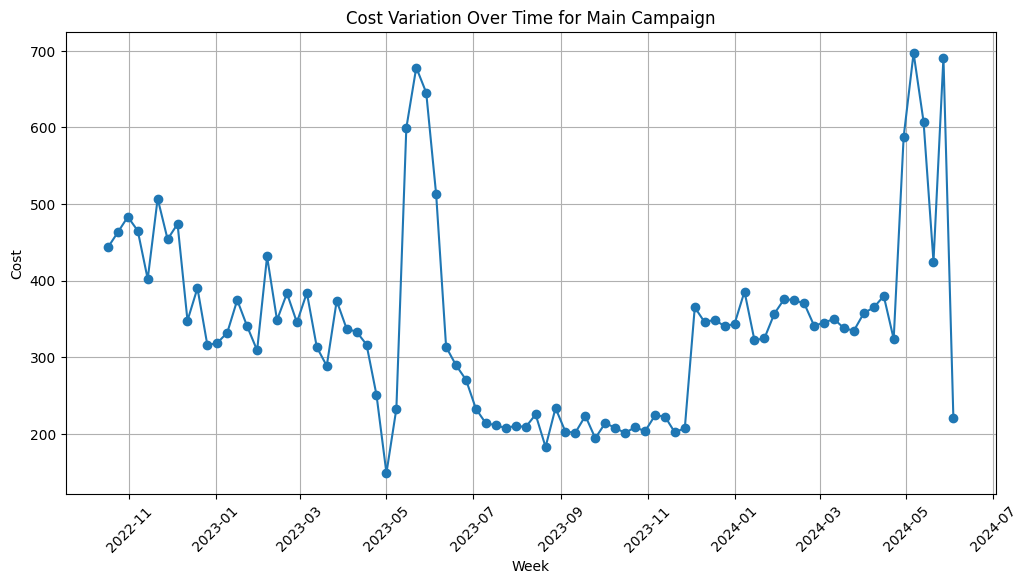

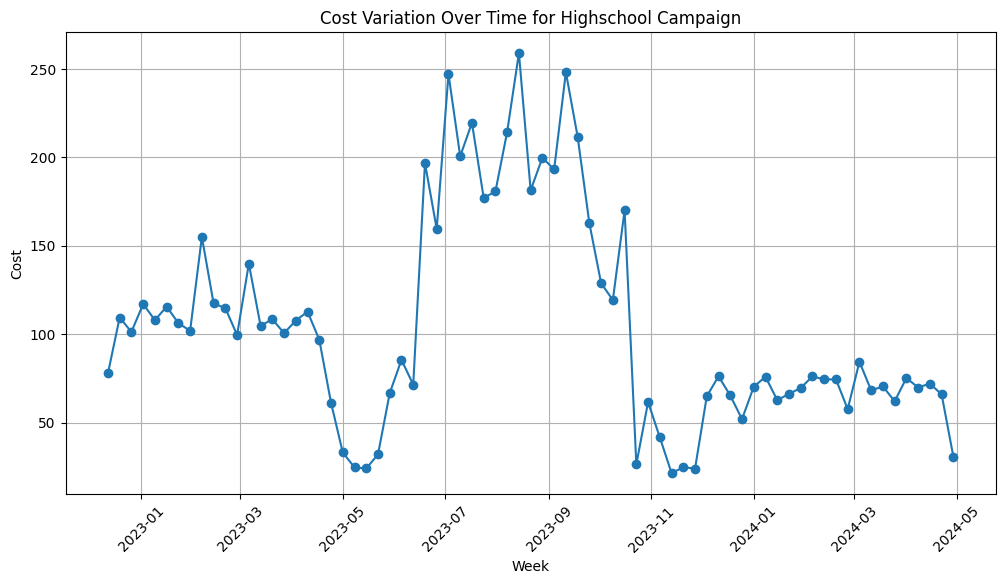

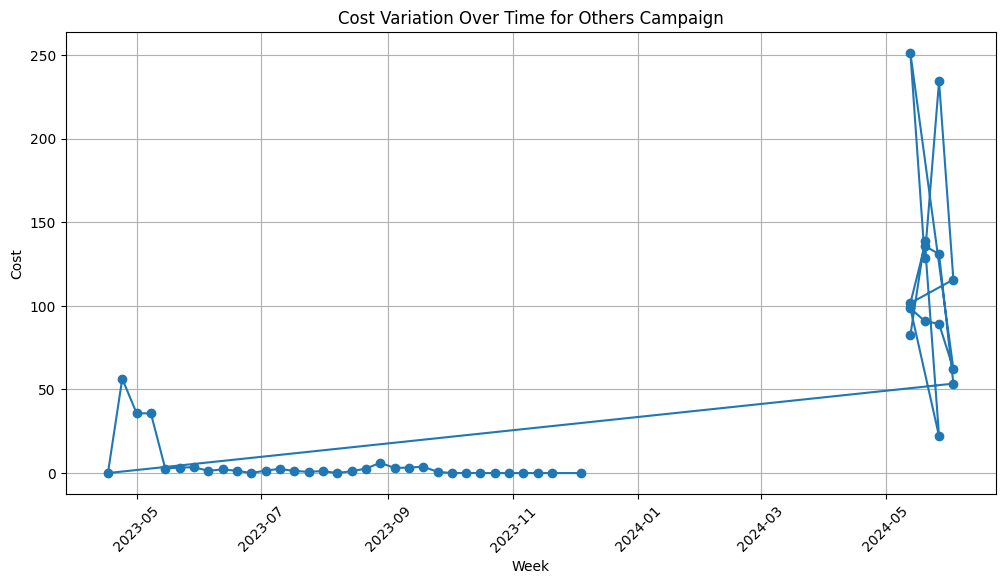

In [18]:
# Plot cost variation over time for each dataset
plot_cost_variation(B_main, 'Cost Variation Over Time for Main Campaign')
plot_cost_variation(B_highschool, 'Cost Variation Over Time for Highschool Campaign')
plot_cost_variation(B_others, 'Cost Variation Over Time for Others Campaign')

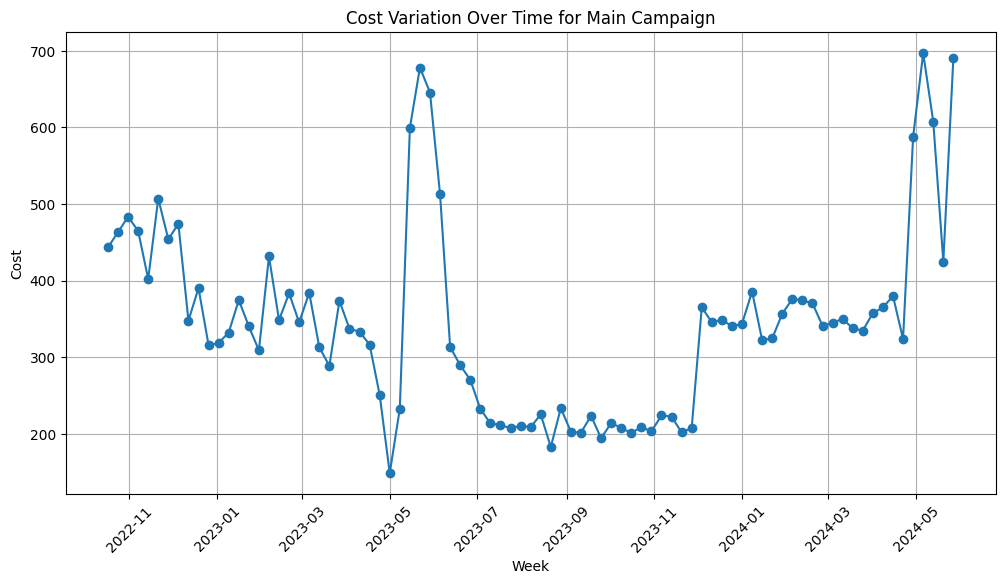

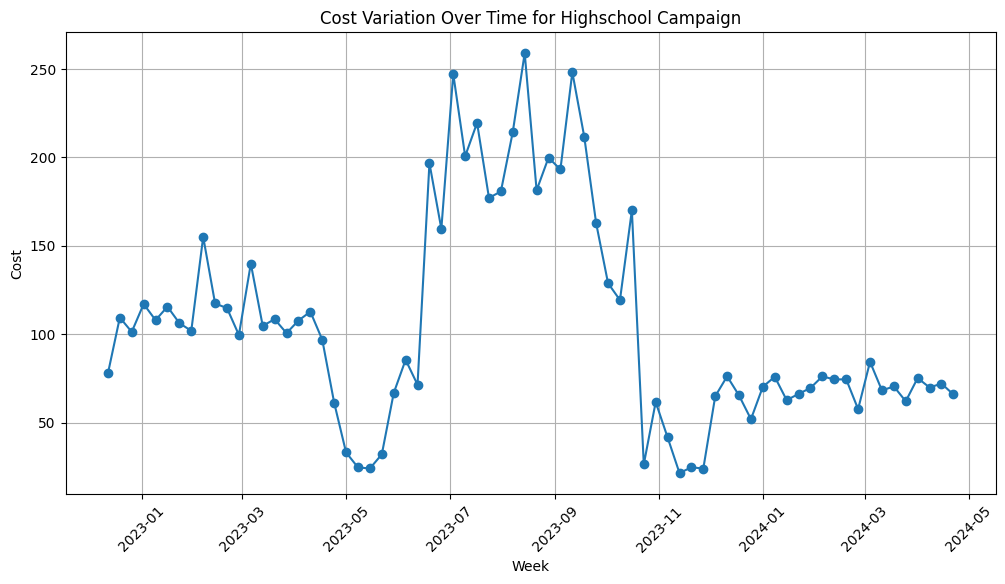

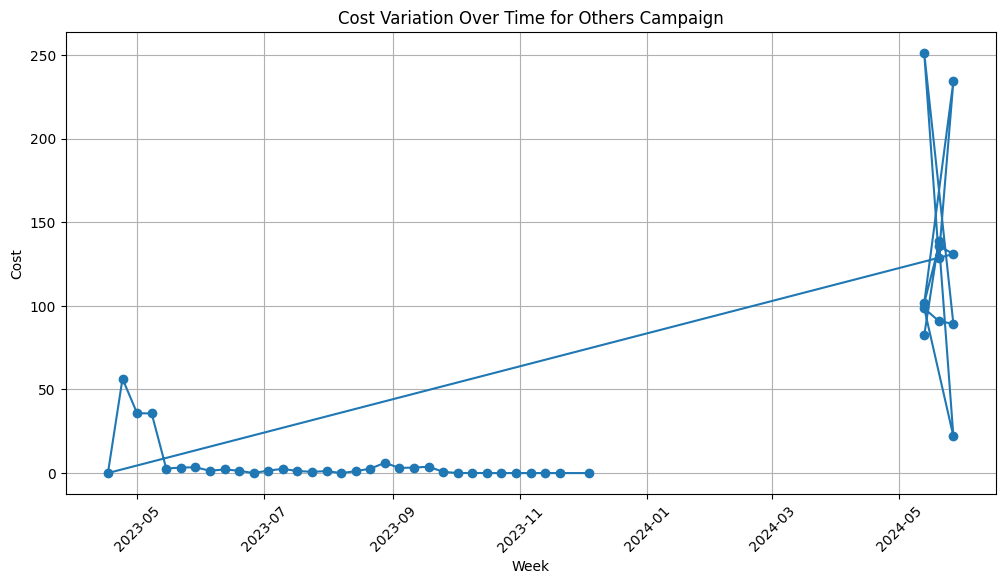

In [19]:
B_main = remove_last_week(B_main)
B_highschool = remove_last_week(B_highschool)
B_others = remove_last_week(B_others)
# Plot cost variation over time for each dataset
plot_cost_variation(B_main, 'Cost Variation Over Time for Main Campaign')
plot_cost_variation(B_highschool, 'Cost Variation Over Time for Highschool Campaign')
plot_cost_variation(B_others, 'Cost Variation Over Time for Others Campaign')

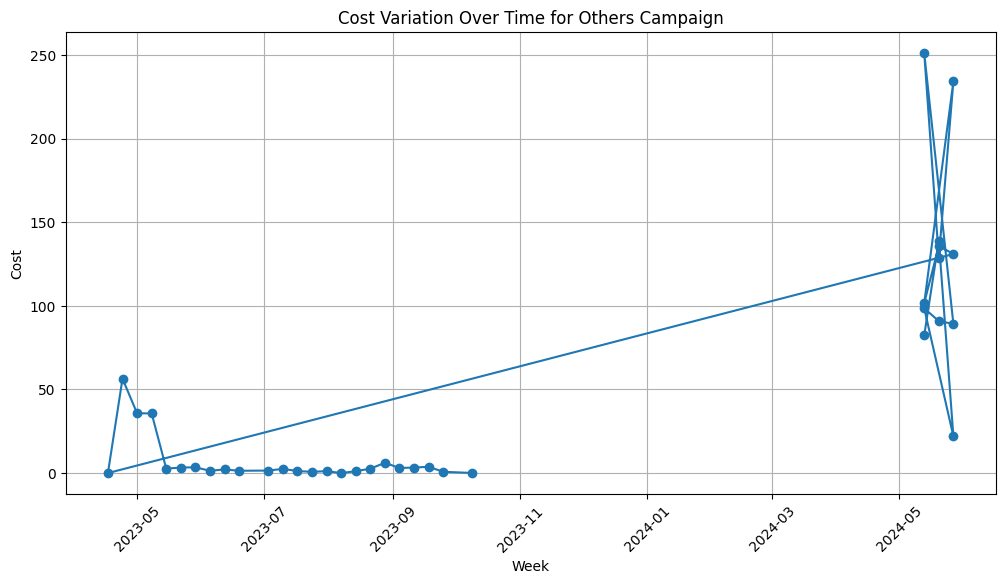

In [20]:
# Remove rows with Cost value of 0 in the 'Others' campaign
B_others = B_others[B_others['Cost'] != 0]
plot_cost_variation(B_others, 'Cost Variation Over Time for Others Campaign')

In [21]:
# Concatenate the three DataFrames
df_combined_B = pd.concat([B_highschool, B_main, B_others])

# Group by 'Week' and sum the relevant columns
df_aggregated_B = df_combined_B.groupby('Week').sum().reset_index()

# Drop unnecessary columns
columns_to_drop = ['Campaign', 'CTR', 'Currency code','Avg. CPC','Cost / conv.', 'Conv. rate']
df_aggregated_B = df_aggregated_B.drop(columns=columns_to_drop)

df_aggregated_B.head(10)

,Week,Budget,Clicks,Impr.,Cost,Conversions
0,2022-10-17,65,283,3678,443.33,3.0
1,2022-10-24,65,267,3269,463.10,12.0
2,2022-10-31,65,425,4934,483.25,6.0
3,2022-11-07,65,534,5908,465.03,13.0
4,2022-11-14,65,493,5938,401.97,10.0
5,2022-11-21,65,643,7380,507.07,23.0
6,2022-11-28,65,569,7021,453.89,19.0
7,2022-12-05,65,579,6349,473.99,27.0
8,2022-12-12,81,441,5442,425.52,13.0
9,2022-12-19,65,376,5841,499.57,7.0


In [22]:
# Save the cleaned DataFrames to Excel files
B_highschool.to_excel('/content/sample_data/School B/highschool_cleaned.xlsx', index=False)
B_main.to_excel('/content/sample_data/School B/main_cleaned.xlsx', index=False)
B_others.to_excel('/content/sample_data/School B/others_cleaned.xlsx', index=False)

# Save the aggregated DataFrame to an Excel file
df_aggregated_B.to_excel('/content/sample_data/School B/total_marketing_effects_B.xlsx', index=False)

# Display the paths to the saved files
print("Files saved successfully:")
print("/content/sample_data/School B/highschool_cleaned.xlsx")
print("/content/sample_data/School B/main_cleaned.xlsx")
print("/content/sample_data/School B/others_cleaned.xlsx")
print("/content/sample_data/School B/total_marketing_effects_B.xlsx")


Files saved successfully:
/content/sample_data/School B/highschool_cleaned.xlsx
/content/sample_data/School B/main_cleaned.xlsx
/content/sample_data/School B/others_cleaned.xlsx
/content/sample_data/School B/total_marketing_effects_B.xlsx
